In [220]:
import numpy as np
from PIL import Image, ImageOps
from scipy.fft import fft

In [221]:
img_pil = Image.open('lena.png')        #to read image
# img_pil.show()    

gray_image = ImageOps.grayscale(img_pil)
# gray_image.show()

gray_img_pil_np = np.array(gray_image)


In [222]:
gray01 = gray_img_pil_np/255     #scaling 0 to 1

In [223]:
gray01

array([[0.63529412, 0.63529412, 0.63137255, ..., 0.6745098 , 0.62745098,
        0.51372549],
       [0.63529412, 0.63529412, 0.63137255, ..., 0.6745098 , 0.62745098,
        0.51372549],
       [0.63529412, 0.63529412, 0.63137255, ..., 0.67058824, 0.61960784,
        0.50980392],
       ...,
       [0.16862745, 0.17647059, 0.19215686, ..., 0.40784314, 0.39607843,
        0.38039216],
       [0.16862745, 0.18431373, 0.20392157, ..., 0.4       , 0.40784314,
        0.41176471],
       [0.17254902, 0.18431373, 0.21176471, ..., 0.39607843, 0.41176471,
        0.42352941]])

In [224]:
def fast_fourier_transform_2(image):
    fft1 = fft(image)
    fft2 = fft(fft1.transpose())
    return fft2

In [226]:
fft2 = fast_fourier_transform_2(gray01)

magnitude = np.sqrt(np.real(fft2)**2+np.imag(fft2)**2)

s = np.log(1+abs(magnitude))


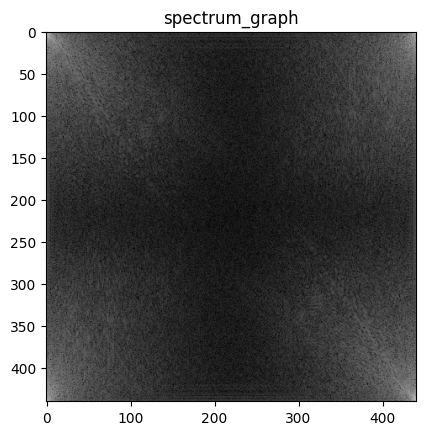

In [227]:
plt.imshow(s, cmap = 'gray')
plt.title("spectrum_graph")
plt.show()

Text(0.5, 1.0, 'Shifted Spectrum')

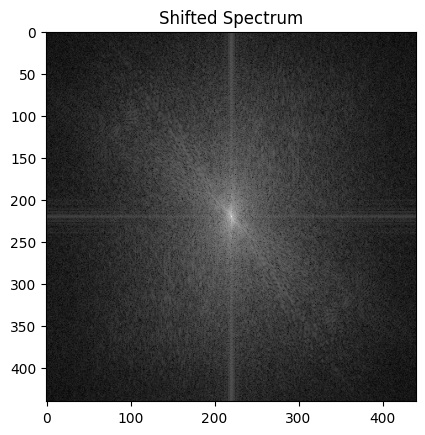

In [229]:
spectrum_shifted = np.fft.fftshift(magnitude)
spectrum_shifted = np.log(1+abs(spectrum_shifted))

plt.imshow(spectrum_shifted, cmap = 'gray')
plt.title('Shifted Spectrum')

Text(0.5, 1.0, 'Phase angle')

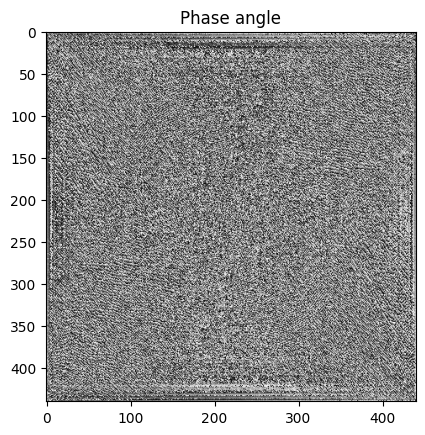

In [230]:
phase_angle = np.arctan2(np.imag(fft2),np.real(fft2))
plt.imshow(phase_angle, cmap = 'gray')
plt.title('Phase angle')

Text(0.5, 1.0, 'Shifted Phase angle')

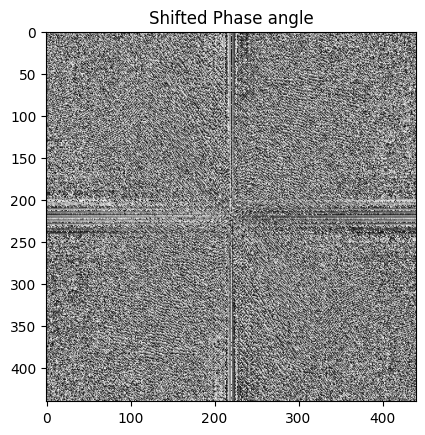

In [231]:
shifted_phase_angle = np.fft.fftshift(phase_angle)
plt.imshow(shifted_phase_angle, cmap = 'gray')
plt.title('Shifted Phase angle')

In [232]:
#2b

# fft2_conjugate = np.conjugate(fft2)

fft2_conjugate = np.real(fft2) + np.imag(fft2)*complex('j')*(-1)

f1 = fast_fourier_transform_2(fft2_conjugate)

# fx = np.conjugate(fx)

idft2 = np.real(f1) + np.imag(f1)*complex('j')*(-1)

In [233]:
idft2 = idft2/(gray_img_pil_np.shape[0]*gray_img_pil_np.shape[1])

In [234]:
idft2_real = np.real(idft2)

In [235]:
idft2_real

array([[0.63529412, 0.63529412, 0.63137255, ..., 0.6745098 , 0.62745098,
        0.51372549],
       [0.63529412, 0.63529412, 0.63137255, ..., 0.6745098 , 0.62745098,
        0.51372549],
       [0.63529412, 0.63529412, 0.63137255, ..., 0.67058824, 0.61960784,
        0.50980392],
       ...,
       [0.16862745, 0.17647059, 0.19215686, ..., 0.40784314, 0.39607843,
        0.38039216],
       [0.16862745, 0.18431373, 0.20392157, ..., 0.4       , 0.40784314,
        0.41176471],
       [0.17254902, 0.18431373, 0.21176471, ..., 0.39607843, 0.41176471,
        0.42352941]])

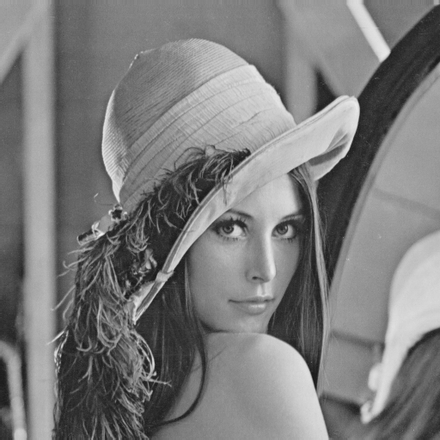

In [236]:
Image.fromarray((idft2_real*255).astype(np.uint8))

In [237]:
d = gray_img_pil_np - (idft2_real*255).astype(np.uint8)

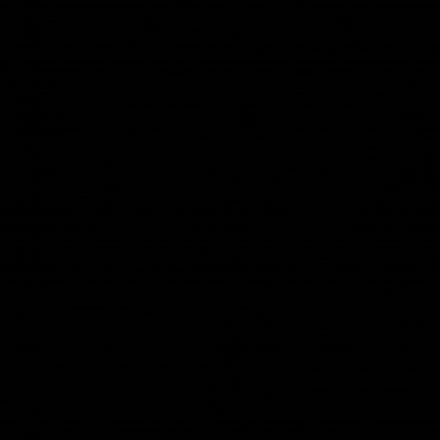

In [238]:
Image.fromarray(d.astype(np.uint8))

In [239]:
d

array([[1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 1, 1, 1],
       [0, 1, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1]], dtype=uint8)